In [1]:
from sklearn.svm import SVC 
from sklearn import datasets 
import matplotlib.pyplot as plt 
import numpy as np
from bonnerlib import dfContour, df3D
%matplotlib inline


note: There are two setups with this assignment that could be improved.
1. The partition of training and testing samples. Currently we are assigning 200 to training and 2000 to testing. But actually it is better the other way around, more training data is preferred to improve the model performance. In fact, with this few training samples, the model is unstable. With every changing random seed (different samples), the result is significantly different. 
2. Instead of testing set it should actually be called validation set, since it is used to tune the hyperparameters.

## Q0

Scikit-learn contains a number of synthetic data sets. In this question, we will perform SVM experiments on one of them, called Moons (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html), which has two- dimensional input points belonging to two classes. First display a random sample of Moons data.

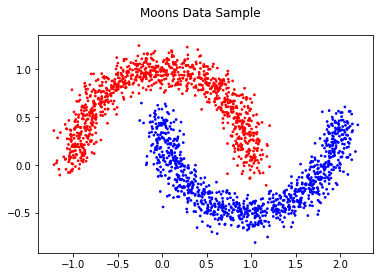

In [2]:

data = datasets.make_moons(n_samples=2000, noise=0.1)
X,y = data
plt.figure()
plt.suptitle('Moons Data Sample')
colors = np.array(['r','b'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y],s=3) 
plt.show()

In [3]:
clf = SVC(gamma=1.0, C=1.0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

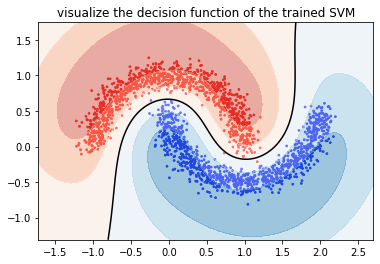

In [4]:
dfContour(clf,data, title = 'visualize the decision function of the trained SVM')

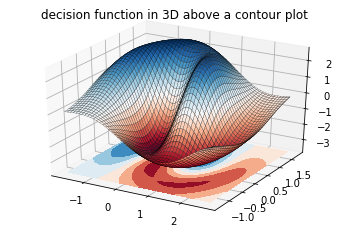

In [5]:
df3D(clf,data, title = 'decision function in 3D above a contour plot')

## Q1
Generate two random samples of Moons data, a training set with 200 points and a test set with 2000 points. Both sets should have a noise level of 0.4 (so that the two moon classes overlap significantly). Use these two data sets throughout the rest of this question. In the questions below, you will be evaluating the training error and the test error of an SVM. The training error is the error on the training data,and the test error is the error on the test data.

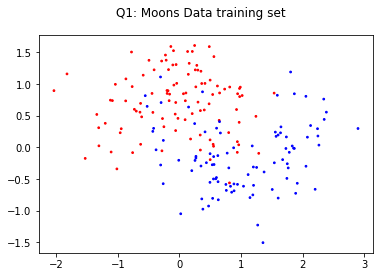

In [105]:
# set random seed
seed = 0
#training set
X_all, y_all = datasets.make_moons(n_samples=2200, noise=0.4,random_state = seed)
X = X_all[:200]
y = y_all[:200]

# plot
plt.figure()
plt.suptitle('Q1: Moons Data training set')
colors = np.array(['r','b'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y],s=3) 
plt.show()

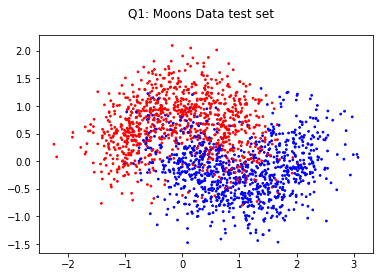

In [106]:
#test set
Xtest = X_all[200:]
Ytest = y_all[200:]
# plot
plt.figure()
plt.suptitle('Q1: Moons Data test set')
colors = np.array(['r','b'])
plt.scatter(Xtest[:, 0], Xtest[:, 1], color=colors[Ytest],s=3) 
plt.show()

## Q2
A soft-margin SVM with an RBF kernel requires two parameters, C and γ. Write a Python program that carries out an exhaustive grid search for the best values of these parameters. (Do not use Scikit-learn’s build-in grid-search facility.) You should consider values of C and γ spread over several orders of magnitude. Choose them so that the values of log C are equally spaced, and likewise for log γ. You should use at least five values per order-of-magnitude (i.e., per factor-of-ten). (You may find the function numpy.linspace useful.) For each combination of values of C and γ, fit an SVM to the training data and evaluate its test error. Save the combination of C and γ that gives the lowest test error. Call these values C0 and γ0. Report these values as well as the test error. Generate and hand in a contour plot of the decision function with the decision boundary and margins highlighted.

In [107]:
grid_size = 30
C_range = np.logspace(-3, 3, grid_size )
gamma_range = np.logspace(-3, 3, grid_size )
# placeholder to store the scores
scores = np.zeros([grid_size, grid_size])
# enumerate over C and gamma values
for i, c in enumerate(C_range):
    for j, g in  enumerate(gamma_range):
        # train the SVM
        clf = SVC(gamma=g, C=c)
        clf.fit(X, y)
        # store the score
        score = clf.score(Xtest,Ytest)
        scores[i,j] = score


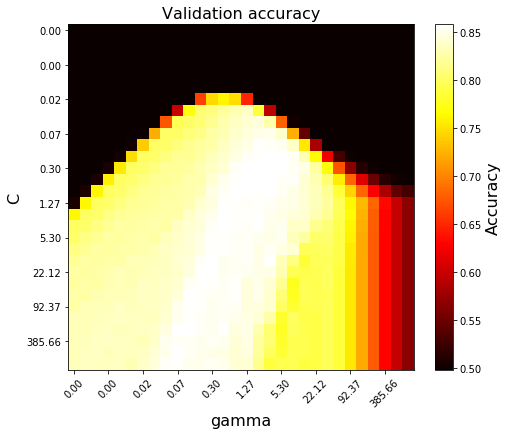

In [108]:
# Draw heatmap of the validation accuracy as a function of gamma and C
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma', fontsize = 16)
plt.ylabel('C', fontsize = 16)
# plot colorbar
cb = plt.colorbar()
cb.set_label('Accuracy',fontsize=16)
# only display lable ticks every 3 of the grid values
positions = np.arange(0, grid_size, 3)
x_labels = ["{:.2f}".format(g) for g in gamma_range[::3]]
y_labels = ["{:.2f}".format(c) for c in C_range[::3]]
plt.xticks(positions, x_labels, rotation=45)
plt.yticks(positions, y_labels)
plt.title('Validation accuracy', fontsize = 16)
plt.show()

As we can see, the hyperparameters C and gamma together controls the behavior of the model. Actually, for certain value pairs of gamma and C along a diagnal region, the model performs equally good. This is because smoother models, i.e., lower gamma, can be made more complex by increasing the importance of accurately classifying each point, i.e., larger C. *

*reference: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [109]:
#examine the best model
ind_best = np.unravel_index(np.argmax(scores, axis=None), scores.shape)
c_best = C_range[ind_best[0]]
g_best = gamma_range[ind_best[1]]
best_score = scores[ind_best]

print("Best gamma: {:.02f}, best C:{:.02f}, accuracy:{:.03f}".format(g_best,c_best,best_score))

Best gamma: 5.30, best C:0.30, accuracy:0.858


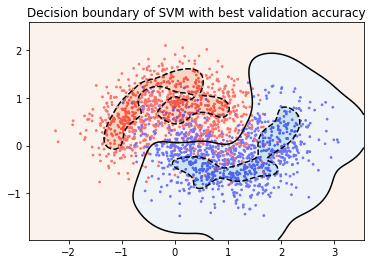

In [110]:
# train the best classifier again
clf = SVC(gamma = g_best, C = c_best)
clf.fit(X,y)
data = (Xtest,Ytest)
# plot the decision boundary
dfContour(clf,data, margins = 1, title = "Decision boundary of SVM with best validation accuracy")

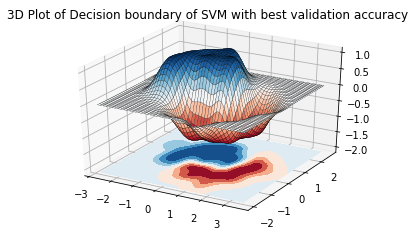

In [111]:
# plot 3D 
df3D(clf,data ,title = "3D Plot of Decision boundary of SVM with best validation accuracy")

## Q3
In this question you will fix the value of γ and vary the value of C. Generate two curves, one of test error vs log(C), and one of training error vs log(C). Use γ = γ0, and use 100 different values of log(C) equally spaced between log(C0) − 3 and log(C0) + 3. For each value of C you will have to retrain and retest the SVM. Plot both curves on one set of axes, using blue for the training error and green for the test error. You should find that the training error tends to decrease as C increases, and that the test error first tends to decrease and then increase, with its minimum very near C0. Provide an intuitive explanation of this behavior.

In [112]:
grid_size = 100
C_range = np.logspace(-3,3,grid_size)
# placeholder to store scores
scores_train = np.zeros(grid_size)
scores_test = np.zeros(grid_size)

# loop over C's
for i, c in enumerate(C_range):
    # train the SVM
    clf = SVC(gamma=g_best, C=c)
    clf.fit(X, y)
    # store the score
    scores_train[i] = 1 - clf.score(X,y)
    scores_test[i] = 1 - clf.score(Xtest,Ytest)


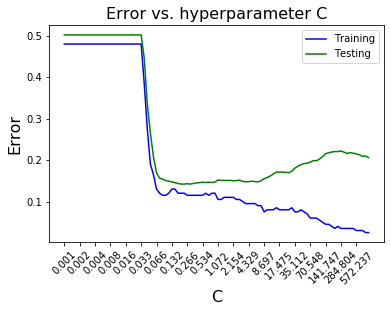

In [113]:
# plot training and testing error
plt.plot(scores_train, c ='b')
plt.plot(scores_test, c = 'g')

# set labels
positions = np.arange(0, grid_size, 5)
x_labels = ["{:.3f}".format(c) for c in C_range[::5]]
plt.xticks(positions, x_labels, rotation=45)
plt.title('Validation accuracy', fontsize = 16)
plt.xlabel('C', fontsize = 16)
plt.ylabel('Error', fontsize = 16)


plt.legend(["Training","Testing"])
plt.title("Error vs. hyperparameter C",  fontsize = 16)
plt.show()

As expected, the training error is decreasing, and the testing error first decreases until around the best C found, then increase. This happens because as C increase, the model goes from underfitting to overfitting. A larger C penalises more on points misclassified (on the wrong side of the margin), thus encouraging a more complecated function that can better separate two class. Model with C value too large tries to fit all the noises in the training set, thus does not have the ability to generalize to common cases.

## Q4
Generate 7 contour plots of the decision function for different values of C. The values of log(C) should be equally spaced between log(C0) − 3 and log(C0) + 3, inclusive. Use γ = γ0 for each value of C. Display the 7 contour plots in a single figure in a grid pattern. (You will have to use the Python function plt.subplot (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)) The plots should highlight the decision boundaries, but not the margins. Provide an intuitive explanation of the changes you see. (Feel free to include other figures to support your explanations.)

/Users/yue/Box Sync/Vandy/2019 Fall/CS6362 ML/HW/Prog.2/bonnerlib.py:48: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='solid')
/Users/yue/Box Sync/Vandy/2019 Fall/CS6362 ML/HW/Prog.2/bonnerlib.py:48: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='solid')


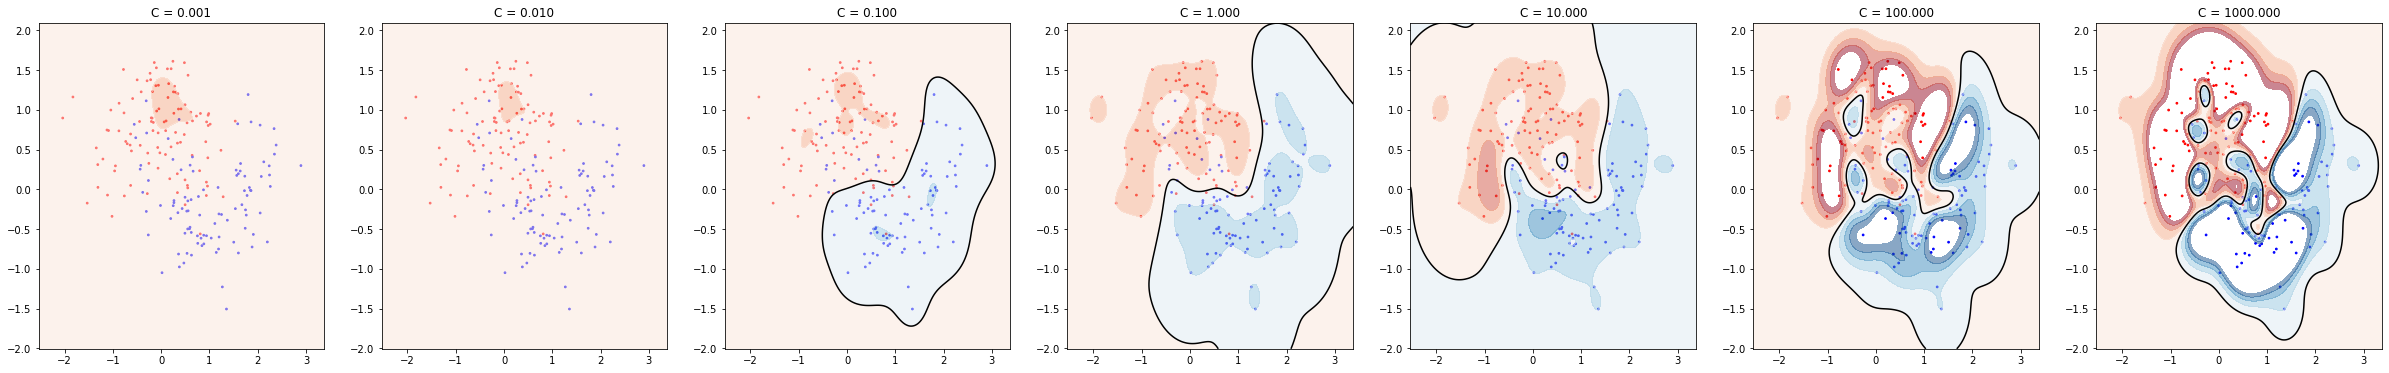

In [114]:
grid_size = 7
fig, axes = plt.subplots(1, grid_size,  figsize = (42,6))
C_range = np.logspace(-3,3,grid_size)

# loop over C's
for i, c in enumerate(C_range):
    # train the SVM
    clf = SVC(gamma=g_best, C=c)
    clf.fit(X, y)
    # plot the function
    plt.axes(axes[i])
    data = (X,y)
    dfContour(clf,data, title = "C = {:0.3f}".format(c))



As we can see, as C goes larger, the countour is more and more complex to reduce misclassification, leading to overfitting. When C is too low, the model does not have the ability to distinguish between classes, and there is no countour found. From the plot C between 0.1 and 1 is resonable. The best C found (0.3) falls in this range.

## Q5
In this question you will fix the value of C and vary the value of γ. Generate two curves, one of test error vs log(γ), and one of training error vs log(γ). Use C = C0, and use 100 different values of log(γ) equally spaced between log(γ0) – 3 and log(γ0)+3. For each value of γ you will have to retrain and retest the SVM. Plot both curves on one set of axes, using blue for the training error and green for the test error. You should find that the training error tends to decrease as γ increases, and that the test error first tends to decrease and then increase, with its minimum very near γ0. Provide an intuitive explanation of this behavior.

In [115]:
grid_size = 100
gamma_range = np.logspace(-3,3,grid_size)
# placeholder to store scores
scores_train = np.zeros(grid_size)
scores_test = np.zeros(grid_size)

# loop over C's
for i, g in enumerate(gamma_range):
    # train the SVM
    clf = SVC(gamma=g, C=c_best)
    clf.fit(X, y)
    # store the score
    scores_train[i] = 1 - clf.score(X,y)
    scores_test[i] = 1 - clf.score(Xtest,Ytest)



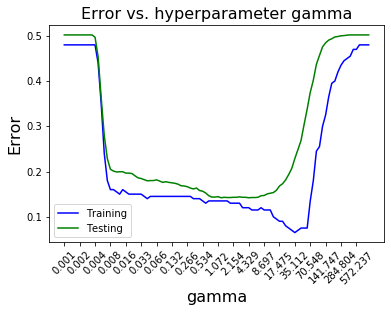

In [116]:
# plot training and testing error
plt.plot(scores_train, c ='b')
plt.plot(scores_test, c = 'g')

# set labels
positions = np.arange(0, grid_size, 5)
x_labels = ["{:.3f}".format(g) for g in gamma_range[::5]]
plt.xticks(positions, x_labels, rotation=45)
plt.title('Validation accuracy', fontsize = 16)
plt.xlabel('gamma', fontsize = 16)
plt.ylabel('Error', fontsize = 16)


plt.legend(["Training","Testing"])
plt.title("Error vs. hyperparameter gamma",  fontsize = 16)
plt.show()

As we can see, the training error tends to decrease as gamma increase, and that the test error first tends to decrease and then increase, with an optimal value at around 5.3, which is the best gamma found during grid scanning.

Intuitively, gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’*. If gamma is too large,the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting. When gamma is very small, the region of influence of any selected support vector would include the whole training set, thus the model lacks expressiveness to capture the shape of the data. *

*reference: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

## Q6
Generate 7 contour plots of the decision function for different values of γ. The values of log(γ) should be equally spaced between log(γ0) − 3 and log(γ0) + 3, inclusive. Use C = C0 for each value of γ. Display the 7 contour plots in a single figure in a grid pattern, as in part (d). Provide an intuitive explanation of the changes you see. (Feel free to include other figures to butress your explanation.)

/Users/yue/Box Sync/Vandy/2019 Fall/CS6362 ML/HW/Prog.2/bonnerlib.py:48: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='solid')
/Users/yue/Box Sync/Vandy/2019 Fall/CS6362 ML/HW/Prog.2/bonnerlib.py:48: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='solid')


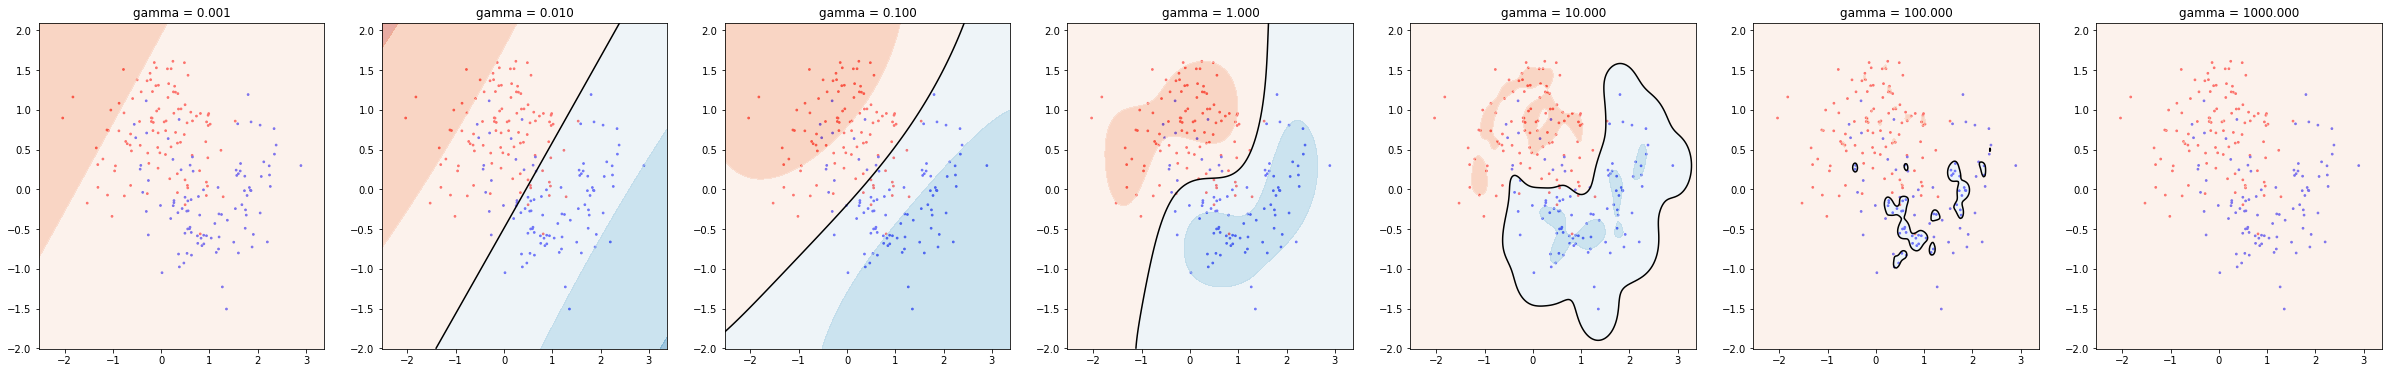

In [117]:
grid_size = 7
fig, axes = plt.subplots(1, grid_size,  figsize = (42,6))
gamma_range = np.logspace(-3,3,grid_size)

# loop over C's
for i, g in enumerate(gamma_range):
    # train the SVM
    clf = SVC(gamma=g, C=c_best)
    clf.fit(X, y)
    # plot the function
    plt.axes(axes[i])
    data = (X,y)
    dfContour(clf,data, title = "gamma = {:0.3f}".format(g))



The separating plane illustrates the idea in part 5. When gamma is small, every point as supporting vector influence the whole area, thus the learned model is merely a linear hypterplane separating the center of the two classes. Whhereas for a small gamma, every point have influence only in its neighbors, and eventually shrinks to only include itself when gamma is too large. As shown in the graph, gamma value around 10 is reasonable.

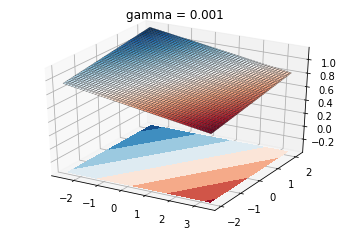

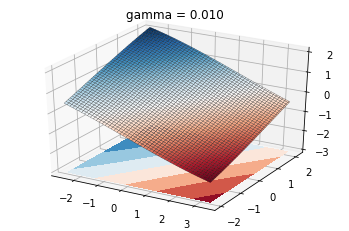

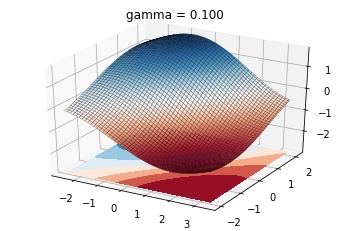

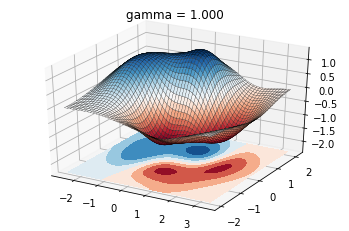

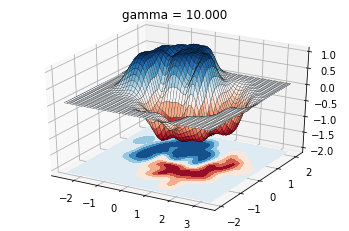

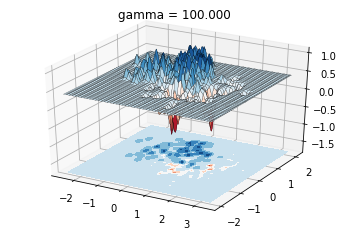

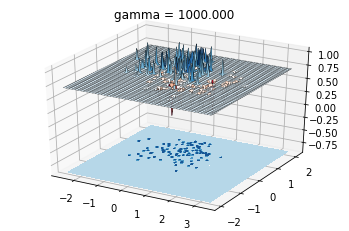

In [118]:
# loop over C's
for i, g in enumerate(gamma_range):
    # train the SVM
    clf = SVC(gamma=g, C=c_best)
    clf.fit(X, y)
    # plot the function
    data = (X,y)
    df3D(clf,data, title = "gamma = {:0.3f}".format(g))


